In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
store_Locations_dataset = pd.read_excel("Sample Dataset (1).xlsx", sheet_name="Store Locations Sheet")
dataset = pd.read_excel("Sample Dataset (1).xlsx")
dataset = dataset.replace("", float('nan')).fillna(0.0)
dataset['Sales Channel'] = dataset['Sales Channel'].replace("On line", "Online")
dataset['Sales Channel'] = dataset['Sales Channel'].replace("In Store", "In-Store")
dataset_version_1 = dataset
dataset_version_1["Total Price"] = dataset_version_1["Order Quantity"]*dataset_version_1["Unit Price"]
list_of_max_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].max()].index)
for i in list_of_max_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
dataset_version_1.loc[dataset_version_1["Order Quantity"] == dataset_version_1["Order Quantity"].min(),"Order Quantity"] = 4
dataset_version_1

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929,998.3
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688,11798.7
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656,7396.8
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006,8944.5


In [3]:
dataset_version_1.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Store Code', 'Product Code',
       'Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost',
       'Total Price'],
      dtype='object')

In [4]:
store_Locations_dataset.columns

Index(['_StoreID', 'City Name', 'County', 'StateCode', 'State', 'Type',
       'Latitude', 'Longitude', 'AreaCode', 'Population', 'Household Income',
       'Median Income', 'Land Area', 'Water Area', 'Time Zone'],
      dtype='object')

In [5]:
loc_en_dataset = pd.merge(dataset_version_1, store_Locations_dataset, left_on='Store Code', right_on='_StoreID', how='inner')
loc_en_dataset

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,...,Type,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,...,City,38.98223,-94.67079,913,186515,74830,72463,194562941,1309517,America/Chicago
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,...,City,42.27087,-83.72633,734,117070,47179,55990,72727009,2254528,America/Detroit
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,...,City,41.30815,-72.92816,203,130322,49771,37192,48407373,3739487,America/New York
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,...,City,41.55815,-73.05150,203,108802,40213,40467,73880017,1086045,America/New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,...,Town,35.78088,-78.81327,919,159769,56034,91579,146322917,2815890,America/New York
7475,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,...,City,46.87719,-96.78980,701,118523,49962,46175,127714801,0,America/Chicago
7476,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,...,City,34.57943,-118.11646,661,158351,42720,52392,274452754,633935,America/Los Angeles
7477,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,...,City,38.90410,-77.01723,202,672228,273390,70848,158364992,18633403,America/New York


In [6]:
loc_en_dataset.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Store Code', 'Product Code',
       'Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost',
       'Total Price', '_StoreID', 'City Name', 'County', 'StateCode', 'State',
       'Type', 'Latitude', 'Longitude', 'AreaCode', 'Population',
       'Household Income', 'Median Income', 'Land Area', 'Water Area',
       'Time Zone'],
      dtype='object')

In [7]:
result = loc_en_dataset.groupby(['City Name', 'Sales Channel'])['Total Price'].sum().reset_index()

# Rename the column to reflect the result
result = result.rename(columns={'Sales': 'Total Sales'})
result

,City Name,Sales Channel,Total Price
0,Abilene,Distributor,46431.0
1,Abilene,In-Store,35831.6
2,Abilene,Online,54899.8
3,Abilene,Wholesale,5038.4
4,Akron,Distributor,17172.1
...,...,...,...
1351,Yonkers,Wholesale,36622.2
1352,York,Distributor,1172.5
1353,York,In-Store,83482.0
1354,York,Online,77619.5


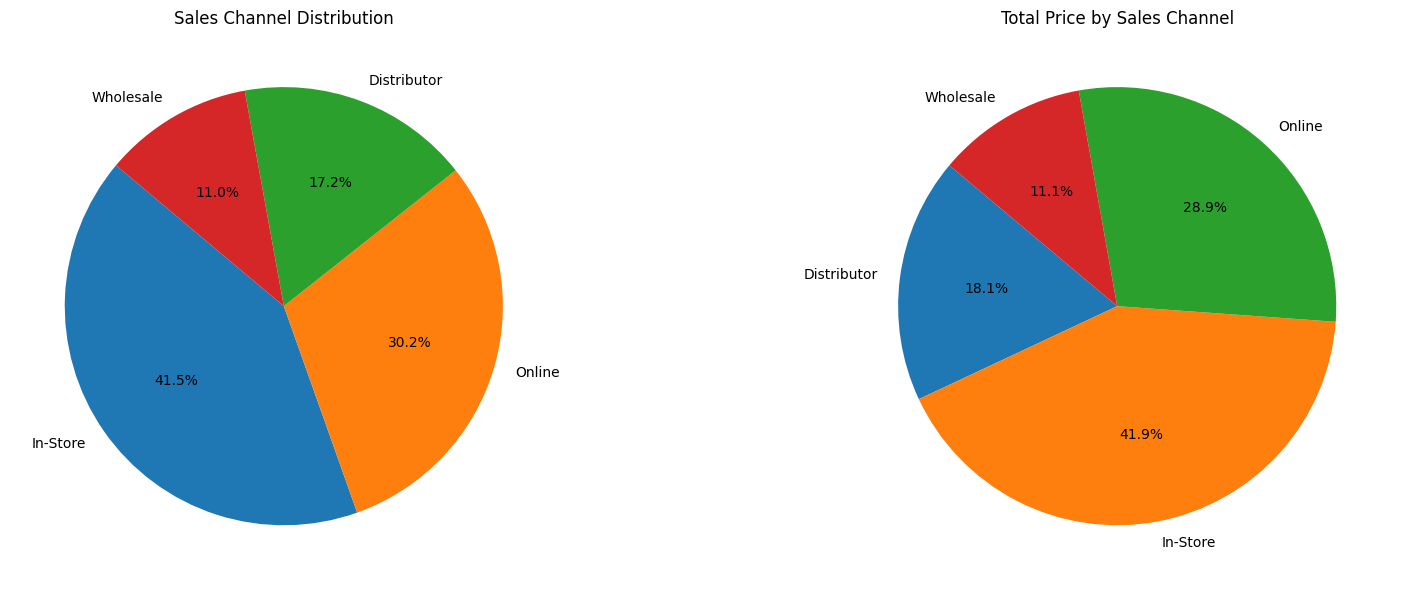

In [8]:
channel_counts = loc_en_dataset['Sales Channel'].value_counts()
price_totals = loc_en_dataset.groupby('Sales Channel')['Total Price'].sum()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))



# Plot pie chart for 'Sales Channel'
axes[0].pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Sales Channel Distribution')

# Plot pie chart for 'Total Price' by 'Sales Channel'
axes[1].pie(price_totals, labels=price_totals.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Total Price by Sales Channel')

# Adjust layout
plt.tight_layout()
plt.show()